In [1]:
import pandas as pd
import akshare as ak
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
df = ak.stock_zh_a_spot_em()
df.to_excel('example.xlsx', sheet_name='Sheet1', index=False)

In [2]:
import pandas as pd
import akshare as ak
df=ak.stock_zh_a_hist(symbol='600436', period='daily', start_date='20230601', end_date='20240601', adjust='qfq')
df.to_csv('600436片仔癀Top3.csv',index=False)

In [3]:
df

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2023-06-01,600436,298.93,294.43,301.23,293.71,19740,593109956.0,2.50,-2.06,-6.20,0.33
1,2023-06-02,600436,294.43,298.51,300.43,293.73,16855,507732383.0,2.28,1.39,4.08,0.28
2,2023-06-05,600436,298.50,295.83,300.42,294.45,11614,348469126.0,2.00,-0.90,-2.68,0.19
3,2023-06-06,600436,295.83,292.93,295.83,291.43,13431,399084721.0,1.49,-0.98,-2.90,0.22
4,2023-06-07,600436,292.83,287.60,293.67,286.55,13020,381959548.0,2.43,-1.82,-5.33,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2024-05-27,600436,228.39,229.07,230.05,226.00,15568,358827266.0,1.78,0.48,1.09,0.26
238,2024-05-28,600436,229.08,226.29,229.48,224.98,13527,309490010.0,1.96,-1.21,-2.78,0.22
239,2024-05-29,600436,226.13,226.48,228.27,225.81,9475,217043437.0,1.09,0.08,0.19,0.16
240,2024-05-30,600436,226.63,223.83,227.48,222.78,15713,356300044.0,2.08,-1.17,-2.65,0.26


Test Statistic: -1.415167
p-value: 0.574984
No. of lags used: 4.000000
Number of observations used: 237.000000
critical value 1%: -3.458247
critical value 5%: -2.873814
critical value 10%: -2.573311


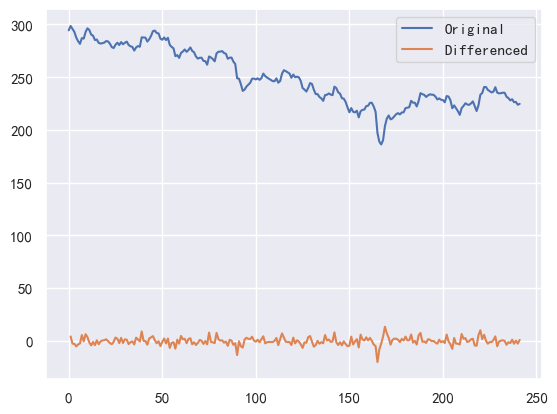

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
lit=['收盘']
data=df[lit]
result = adfuller(data)
print("Test Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("No. of lags used: %f" % result[2])
print("Number of observations used: %f" % result[3])
print("critical value 1%%: %f" % result[4]["1%"])
print("critical value 5%%: %f" % result[4]["5%"])
print("critical value 10%%: %f" % result[4]["10%"])
if result[1] > 0.05:
    diff_data = data.diff().dropna()
    plt.figure()
    plt.plot(data, label='Original')
    plt.plot(diff_data, label='Differenced')
    plt.legend()
    data = diff_data
else:
    plt.figure()
    plt.plot(data, label='Original')
    plt.legend()

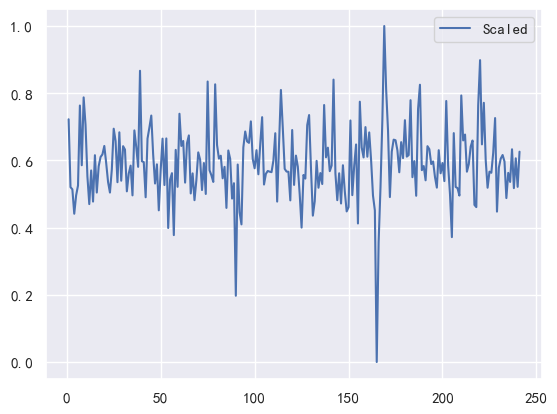

In [5]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
plt.figure()
plt.plot(scaled_data, label='Scaled')
plt.legend()

min aci: (2, 1, 4)


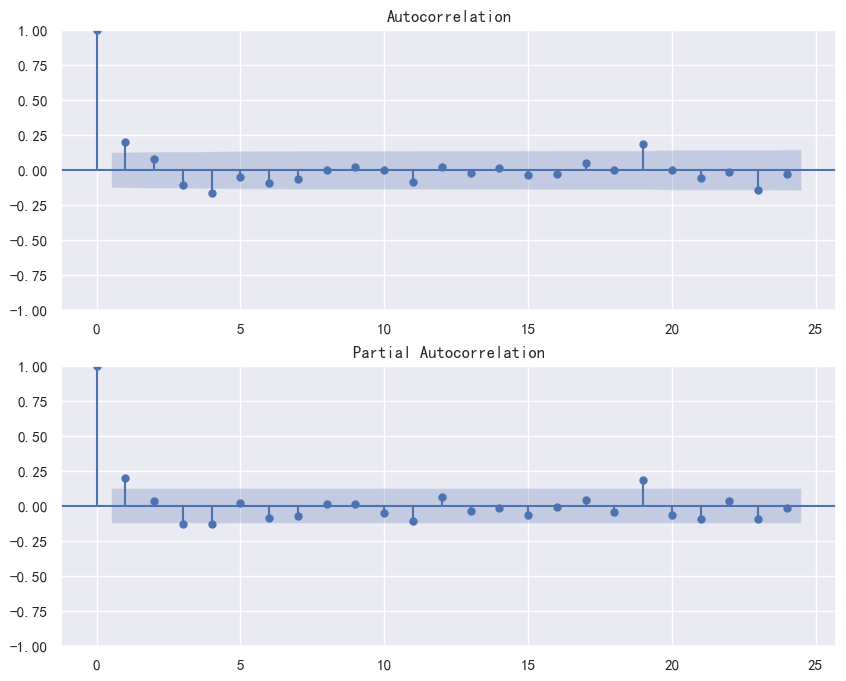

In [6]:
aic_values = {}
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(scaled_data, order=(p, 1, q))
            result = model.fit()
            aic_values[(p, 1, q)] = result.aic
        except:
            continue
min_aic = min(aic_values, key=aic_values.get)
print("min aci:", min_aic)
model = ARIMA(scaled_data, order=min_aic)
result = model.fit()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(scaled_data, ax=axes[0])
plot_pacf(scaled_data, ax=axes[1])
plt.show()

In [7]:
stock_file = '600436片仔癀Top3.csv'
df = pd.read_csv(stock_file, index_col='日期', parse_dates=True)
df

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2023-06-01,600436,298.93,294.43,301.23,293.71,19740,593109956.0,2.50,-2.06,-6.20,0.33
2023-06-02,600436,294.43,298.51,300.43,293.73,16855,507732383.0,2.28,1.39,4.08,0.28
2023-06-05,600436,298.50,295.83,300.42,294.45,11614,348469126.0,2.00,-0.90,-2.68,0.19
2023-06-06,600436,295.83,292.93,295.83,291.43,13431,399084721.0,1.49,-0.98,-2.90,0.22
2023-06-07,600436,292.83,287.60,293.67,286.55,13020,381959548.0,2.43,-1.82,-5.33,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,600436,228.39,229.07,230.05,226.00,15568,358827266.0,1.78,0.48,1.09,0.26
2024-05-28,600436,229.08,226.29,229.48,224.98,13527,309490010.0,1.96,-1.21,-2.78,0.22
2024-05-29,600436,226.13,226.48,228.27,225.81,9475,217043437.0,1.09,0.08,0.19,0.16


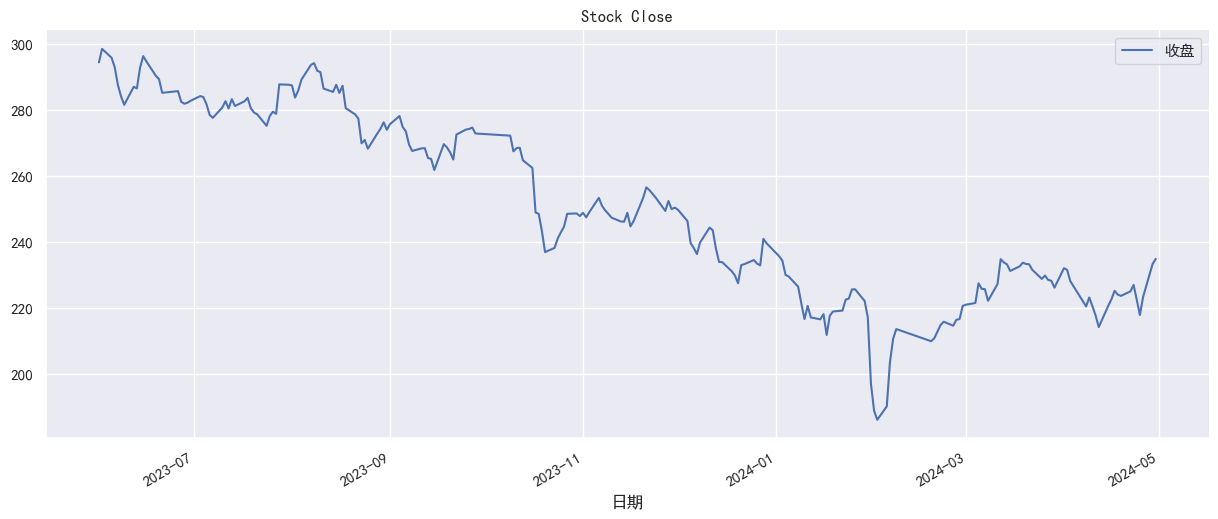

In [8]:
stock_week = df['收盘']#.resample('W-MON').mean()
stock_train = stock_week['2023-06-01':'2024-05-01']
stock_actual=stock_week['2024-05-01':'2024-06-01']
stock_train.plot(figsize=(15,6))
plt.legend()
plt.title('Stock Close')
sns.despine()

In [9]:
stock_train

日期
2023-06-01    294.43
2023-06-02    298.51
2023-06-05    295.83
2023-06-06    292.93
2023-06-07    287.60
               ...  
2024-04-24    222.58
2024-04-25    217.91
2024-04-26    223.37
2024-04-29    233.34
2024-04-30    234.92
Name: 收盘, Length: 222, dtype: float64

In [10]:
stock_actual=stock_week['2024-05-01':'2024-06-01']

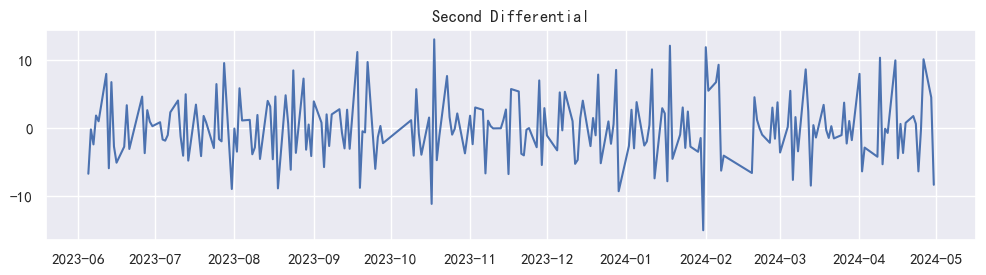

In [11]:
# 将时间序列进行差分并确定参数d
# 一阶差分
stock_diff_1 = stock_train.diff()
stock_diff_1.dropna(inplace=True)
# 二阶差分
stock_diff_2 = stock_diff_1.diff()
stock_diff_2.dropna(inplace=True)
plt.figure(figsize=(12,6))

plt.subplot(2,1,2)
plt.plot(stock_diff_2)
plt.title('Second Differential')
plt.show()

### 拟合ARIMA模型
model = sm.tsa.ARIMA(stock_train, order=(2, 1, 4))
result = model.fit()

In [12]:
stock_future = stock_week['2024-05-01':]

In [13]:
# 使用该模型进行预测
forecast = result.forecast(len(stock_future))
forecast.index=stock_future.index

In [14]:
forecast

日期
2024-05-06    0.615786
2024-05-07    0.585780
2024-05-08    0.583488
2024-05-09    0.601882
2024-05-10    0.593821
2024-05-13    0.582588
2024-05-14    0.595545
2024-05-15    0.598033
2024-05-16    0.585678
2024-05-17    0.590287
2024-05-20    0.598270
2024-05-21    0.590013
2024-05-22    0.587727
2024-05-23    0.595982
2024-05-24    0.593432
2024-05-27    0.587810
2024-05-28    0.593034
2024-05-29    0.594966
2024-05-30    0.589479
2024-05-31    0.590824
Name: predicted_mean, dtype: float64

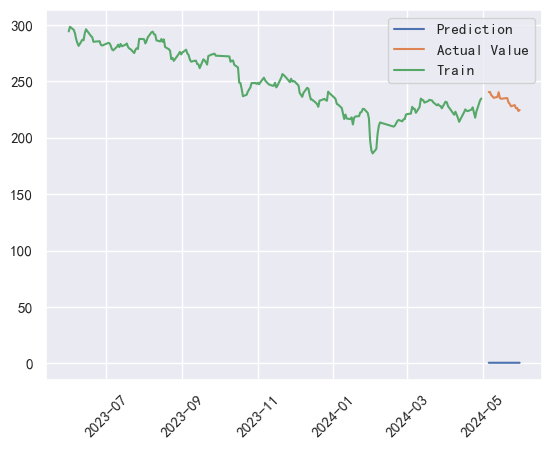

In [15]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.plot(stock_train,label='Train')
plt.legend()
plt.show()

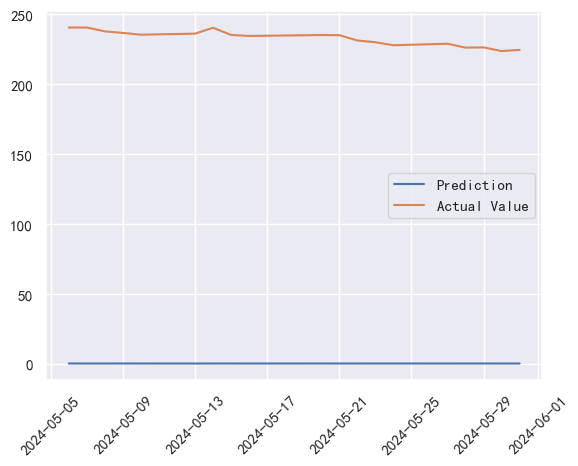

In [16]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.legend()
plt.show()